# Objective - To determine the conditions whether the patients survive for more than 5 years or less than five years after cancer treatment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

haberman=pd.read_csv("haberman.csv")
haberman.head()

,age,operation_year,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [2]:
# number of data-point 

print(haberman.shape)

(305, 4)


### Observations:

    There are 305 data points corresonding to 4 attributes.

In [3]:
# number of features (column_names)

print(haberman.columns)

# Number of features are four -> age, operation_year, axil_nodes, surv_status
# axil_nodes -> axillary nodes - lymph nodes found in armpit reason of our body (This is one of the important feature for detecting survival rate of breast cancer patient)

Index(['age', 'operation_year', 'axil_nodes', 'surv_status'], dtype='object')


In [4]:
haberman["surv_status"].value_counts()

# Number of classes present are 2 (two)
# 1--> patients survives 5 years or longer (224 patients)
# 2--> patients died within 5 years (81 patients)
# This data set is imbalanced data set


1    224
2     81
Name: surv_status, dtype: int64

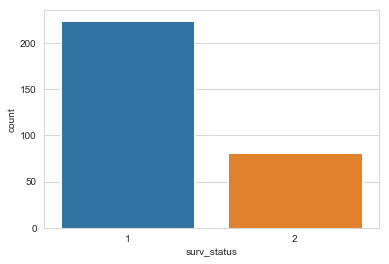

In [37]:
sns.countplot(x="surv_status",data=haberman)

### Observations:

    The given data set is imbalanced data set.
    1--> patients survives 5 years or longer (224 patients)
    2--> patients died within 5 years (81 patients)
    

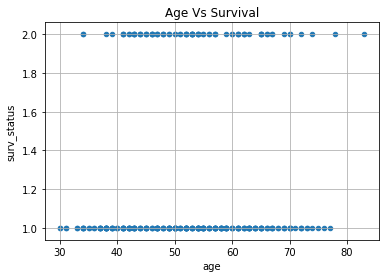

In [5]:
haberman.plot(kind="scatter", x="age", y="surv_status")
plt.title("Age Vs Survival")
plt.grid()
plt.show()

### Observations:

    Most of the patients who's age was less than 40 years survived more than 5 years.
    Patients who's age was greater than 78 years, died within 5 years.

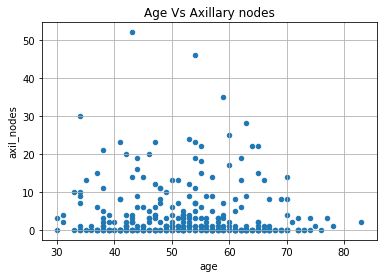

In [6]:
haberman.plot(kind="scatter", x="age", y="axil_nodes")

plt.title("Age Vs Axillary nodes")
plt.grid()
plt.show()

### Observations:

    Most people had axillary nodes between 0 to 10.

In [7]:
haberman["age"].min()

30

### Observations:

    Minimum age of person who was suffered from cancer and operated was 30

In [8]:
haberman["age"].max()

83

### Observations:

    Maximum age of person who was suffered from cancer and operated was 83

In [9]:
import numpy as np

print(np.mean(haberman["age"]))
print(np.mean(haberman["axil_nodes"]))

52.5311475409836
4.036065573770492


### Observations:

    Average age of patient was 52 years.
    Average number of axillary nodes were 4.

In [10]:
import pandas as pd

df=pd.DataFrame(haberman, columns=["age", "operation_year", "axil_nodes", "surv_status"])


In [11]:
df["age"].describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: age, dtype: float64

### Observations:

    25 percent of patients have age less than 44 years.
    50 percent of patients have age less than 52 years.
    75 percent of patients have age less than 61 years.
    

In [12]:
df["axil_nodes"].describe()

count    305.000000
mean       4.036066
std        7.199370
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: axil_nodes, dtype: float64

### Observations:

    25 percent of patients have axillary nodes 0.
    50 percent of patients have axillary nodes less than 1.
    75 percent of patients have axillary nodes less than 4.
    Maximum number of axillary nodes found in any patient is 52.
    

# Univariate Analysis

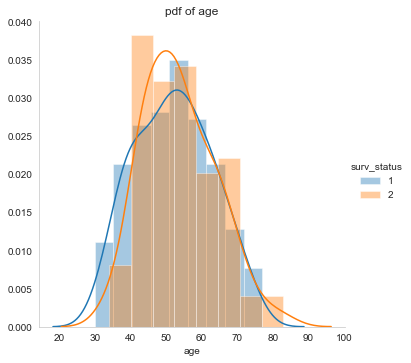

In [59]:
import seaborn as sns

sns.FacetGrid(haberman , hue="surv_status", height=5) \
.map(sns.distplot, "age") \
.add_legend()
plt.title("pdf of age")
plt.grid()
plt.show()

### Observations:

    Most of the patients who died within 5 years had age of 40-50 years.

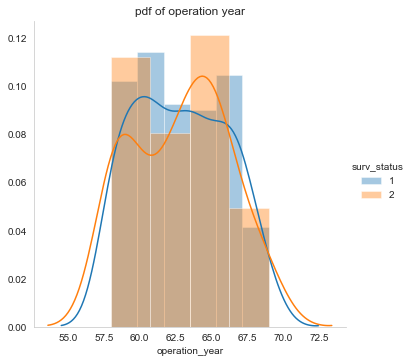

In [60]:
import seaborn as sns

sns.FacetGrid(haberman, hue="surv_status", height=5) \
.map(sns.distplot, "operation_year") \
.add_legend()
plt.title("pdf of operation year")
plt.grid()
plt.show()

### Observations:

    1) Most of the patients who died within 5 years, they were operated from 1963-1966.
    2) Most of the patients who lives more than 5 years, they were operated from 1960-1962.

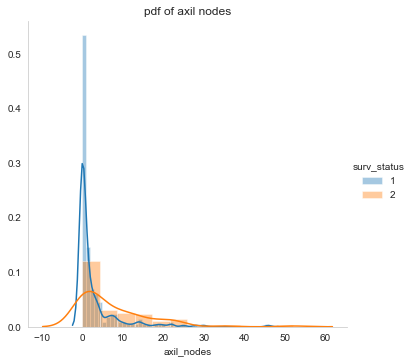

In [58]:
import seaborn as sns

sns.FacetGrid(haberman, hue="surv_status", height=5) \
.map(sns.distplot, "axil_nodes") \
.add_legend()
plt.title("pdf of axil nodes")
plt.grid()
plt.show()

### Observations:

    Most of the people who lived more than 5 years have zero (0) axillary nodes.

## PDFs and CDFs

In [16]:
import numpy as np

more_than_five = haberman.loc[haberman["surv_status"]==1]
more_than_five.head()

,age,operation_year,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [38]:
import numpy as np

less_than_five=haberman.loc[haberman["surv_status"]==2]
less_than_five.head()

,age,operation_year,axil_nodes,surv_status
6,34,59,0,2
7,34,66,9,2
23,38,69,21,2
33,39,66,0,2
42,41,60,23,2


[0.01785714 0.03125    0.04464286 0.0625     0.04464286 0.08035714
 0.04017857 0.05357143 0.09821429 0.06696429 0.07589286 0.08928571
 0.04910714 0.04464286 0.08035714 0.03125    0.02232143 0.04017857
 0.01339286 0.01339286]
[0.01785714 0.04910714 0.09375    0.15625    0.20089286 0.28125
 0.32142857 0.375      0.47321429 0.54017857 0.61607143 0.70535714
 0.75446429 0.79910714 0.87946429 0.91071429 0.93303571 0.97321429
 0.98660714 1.        ]


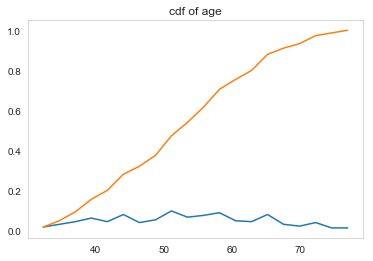

In [55]:
import numpy as np
import matplotlib.pyplot as plt

counts, bin_edges= np.histogram(more_than_five["age"], bins=20, density=True)

pdf=counts/sum(counts)
print(pdf)

cdf=np.cumsum(pdf)
print(cdf)
plt.title("cdf of age")
plt.grid()

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

## Observations :

    More than 75% people survived for more than 5 years whose age are less than 60 years.

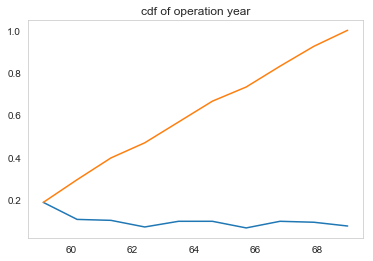

In [54]:

counts, bin_edges=np.histogram(more_than_five["operation_year"], bins=10 , density=True)

pdf=counts/sum(counts)
cdf=np.cumsum(pdf)

plt.grid()
plt.title("cdf of operation year")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

## Observations :
    
    More than 75% people survived whose operation were performed before 1966.

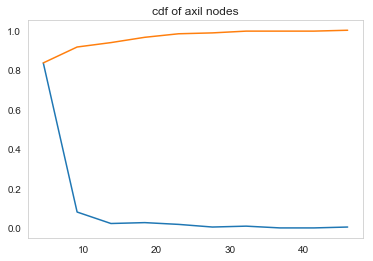

In [53]:
counts, bin_edges=np.histogram(more_than_five["axil_nodes"], bins=10, density=True)

pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.title("cdf of axil nodes")
plt.grid()

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

### Observations:

    82% of patients, who lived more than 5 years had 0 axillary nodes.

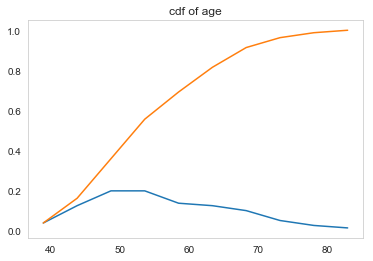

In [52]:
import numpy as np

counts, bin_edges=np.histogram(less_than_five["age"], bins=10, density=True)

pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.title("cdf of age")
plt.grid()

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

## Observations :

    75% of people (who died within 5 year) died within 5 year of operation 
    whose age is less than 60 years.

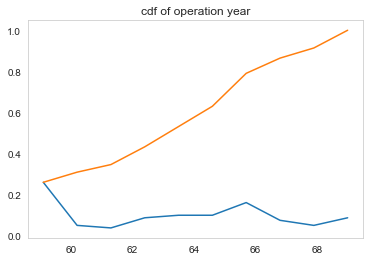

In [51]:
import numpy as np

counts, bin_edges=np.histogram(less_than_five["operation_year"], bins=10, density=True)

pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.title("cdf of operation year")
plt.grid()

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

## Observations:

    80% of people died within 5 year whose operation was performed before 1966.

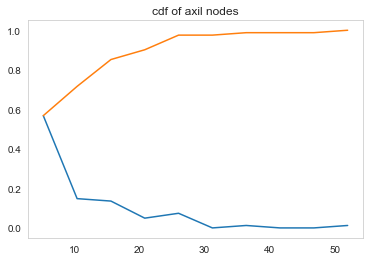

In [50]:
import numpy as np
plt.title("cdf of axil nodes")
counts, bin_edges=np.histogram(less_than_five["axil_nodes"], bins=10, density=True)

pdf=counts/sum(counts)
cdf=np.cumsum(pdf)

plt.grid()

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

### Observations:

    58% of patients, who died within 5 years had 0 axillary nodes.

In [24]:
import numpy as np

print("Patients who lived more than 5 years:")
print("\n quantile of age:")
print(np.percentile(more_than_five["age"],np.arange(0,100,25)))
print("\n quantile of operation year:")
print(np.percentile(more_than_five["operation_year"],np.arange(0,100,25)))
print("\n quantile of axillary nodes:")
print(np.percentile(more_than_five["axil_nodes"],np.arange(0,100,25)))

Patients who lived more than 5 years:

 quantile of age:
[30. 43. 52. 60.]

 quantile of operation year:
[58. 60. 63. 66.]

 quantile of axillary nodes:
[0. 0. 0. 3.]


In [25]:
import numpy as np

print("Patients who lived more than 5 years:")
print("\n 90th percentile of age:")
print(np.percentile(more_than_five["age"],90))
print("\n 90th percentile of operation year:")
print(np.percentile(more_than_five["operation_year"],90))
print("\n 90th percentile of axillary nodes:")
print(np.percentile(more_than_five["axil_nodes"],90))

Patients who lived more than 5 years:

 90th percentile of age:
67.0

 90th percentile of operation year:
67.0

 90th percentile of axillary nodes:
8.0


In [26]:
import numpy as np

print("Patients who died within 5 years:")
print("\n quantile of age:")
print(np.percentile(less_than_five["age"],np.arange(0,100,25)))
print("\n quantile of operation year:")
print(np.percentile(less_than_five["operation_year"],np.arange(0,100,25)))
print("\n quantile of axillary nodes:")
print(np.percentile(less_than_five["axil_nodes"],np.arange(0,100,25)))

Patients who died within 5 years:

 quantile of age:
[34. 46. 53. 61.]

 quantile of operation year:
[58. 59. 63. 65.]

 quantile of axillary nodes:
[ 0.  1.  4. 11.]


In [27]:
import numpy as np

print("Patients who died within 5 years:")
print("\n 90th percentile of age:")
print(np.percentile(less_than_five["age"],90))
print("\n 90th percentile of operation year:")
print(np.percentile(less_than_five["operation_year"],90))
print("\n 90th percentile of axillary nodes:")
print(np.percentile(less_than_five["axil_nodes"],90))

Patients who died within 5 years:

 90th percentile of age:
67.0

 90th percentile of operation year:
67.0

 90th percentile of axillary nodes:
20.0


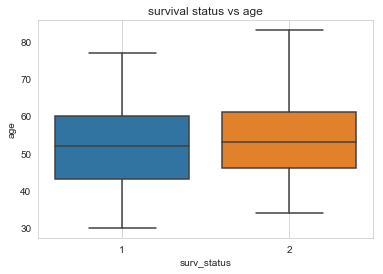

In [48]:
# Box-plot

import seaborn as sns

sns.boxplot(x="surv_status", y="age", data=haberman)
plt.title("survival status vs age")

plt.grid()
plt.show()

### Observations:

    75% of patients who lived more than 5 years were of age less than 60 years.
    More aged patient is, less chances to live more thaan 5 years.
    

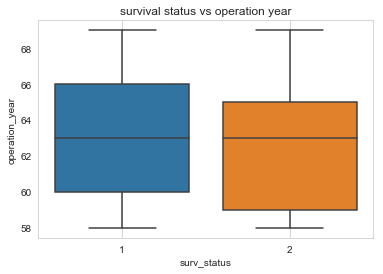

In [47]:
import seaborn as sns

sns.boxplot(x="surv_status", y="operation_year", data=haberman)
plt.title("survival status vs operation year")

plt.grid()

plt.show()

### Observations:

    All operations occured from 1960-1966 if we calculate IQR of 75 percentile and 25 percentile.
    We can see that, as the years increases, number of peoples who lived more than 5 years increases.

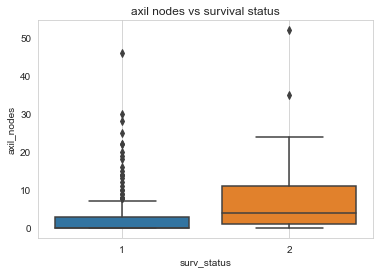

In [46]:
import seaborn as sns

sns.boxplot(x="surv_status", y="axil_nodes", data=haberman)
plt.title("axil nodes vs survival status")

plt.grid()

plt.show()

### Observations:

    Most of the patients who lived more than 5 years had zero axillary nodes.
    Outlier points are plotted beyond whiskers.

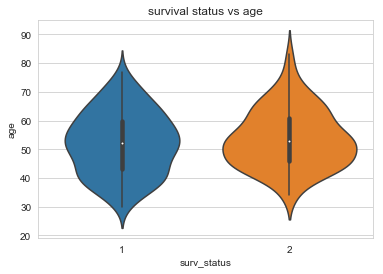

In [45]:
# Violin-plot

sns.violinplot(x="surv_status", y="age", data=haberman, height=5)

plt.title("survival status vs age")

plt.show()

## Observations :

    Upper age limit of people who died within 5 year of treatment is greater than who survived 
    for more than 5 years.
    


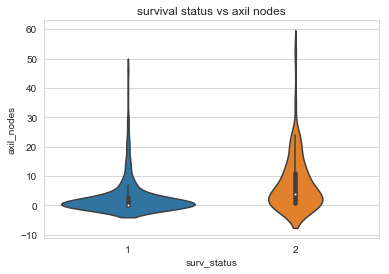

In [44]:
sns.violinplot(x="surv_status", y="axil_nodes", data=haberman , height=5)

plt.title("survival status vs axil nodes")


plt.show()

## Observations:
    
    Most of the people who survived more than 5 years has 0 axil nodes.
    
    The people who died within 5 year has more axil nodes as compared to people who survived for 
    more than 5 years.

# Bivariate Analysis

## Pair-plot

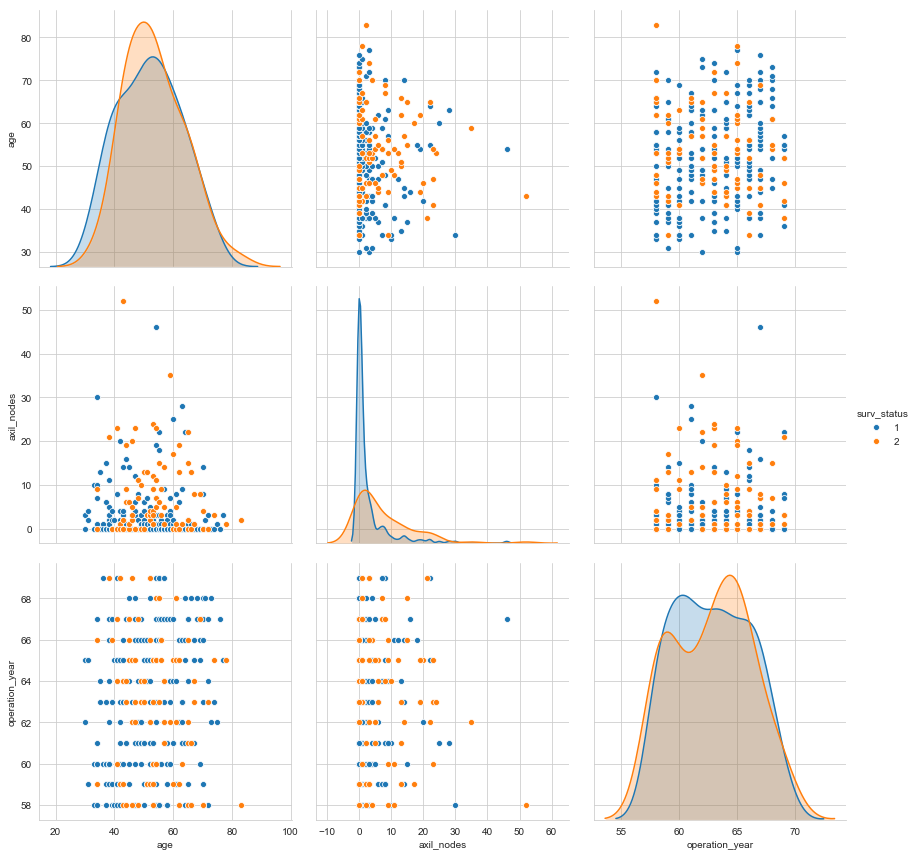

In [69]:
import seaborn as sns

sns.set_style("whitegrid")
sns.pairplot(haberman, hue="surv_status", vars=["age","axil_nodes","operation_year"], height=4)
plt.show()



### Observations:

    In the year 1965, most of the people died within 5 years.
    Patients who has greater axillary nodes, has greater chance to get died within 5 years.

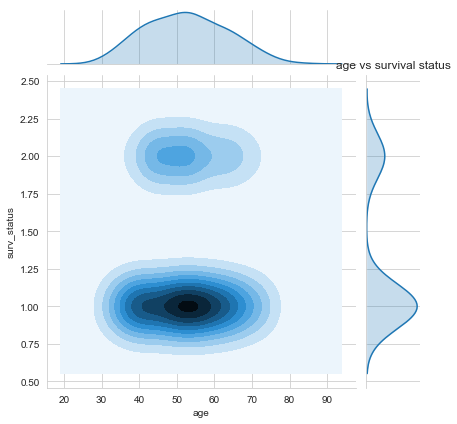

In [41]:
# Contour-plot

sns.jointplot(x="age", y="surv_status", data=haberman, kind="kde")
plt.title("age vs survival status")
plt.show()

### Observations:

    Most of the patients, who lived more than five years had age group of 50-55 years.

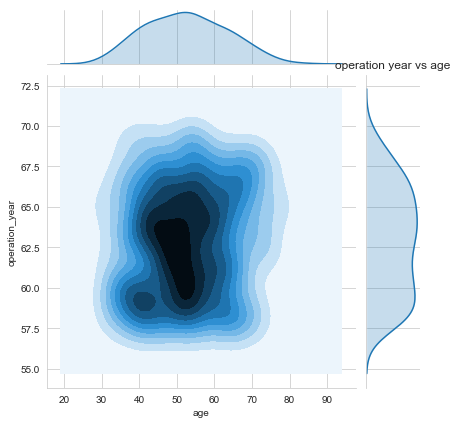

In [40]:
sns.jointplot(x="age", y="operation_year", data=haberman, kind="kde")
plt.title("operation year vs age")
plt.show()


### Observations:

    Most of the people had operated during 1958-1966 and of the age group 42-55.

## Conclusion:
    
    1) Most people who survived for more than 5 years has 0 axil nodes.
    2) As the years increases, tendency to live for more than 5 years after operation increases.
    3) People who was aged ( greater than 78 years) died within 5 years of operation.
    4) Most of the operation occurs during 1958-1966 and of the age group of 42-55.